# Travel Insurance modelling

In this parrt we will focus on the data modeling and Travel insurance purchase prediction.
We will run feature engineering for the data attributes preparation for the model.
We will try variuos ML models to find which best describes and predicts if customer will purchase the travel insurance

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import math

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import train_test_split
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Feature engineering

In [116]:
path_file = '/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S1/Input/TravelInsurancePrediction.csv'
df = pd.read_csv(path_file)
df = df.rename(columns={'Unnamed: 0':'CustomerId'})
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerId           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


,CustomerId,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


Categorical attrbutes values we will converto to numeric yes = 1, no = 0.

We will create age and anual income two groups:
- If customer belongs to 30+ age group
- If customer belonfs to high incomes earning group (1.3M+ per year)

In [117]:
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df['EmploymentType'] = df['Employment Type'].map({'Private Sector/Self Employed': 1, 'Government Sector': 0})

df['AgeGroup30'] = np.where(df.Age >= 30, '1','0')
df['IncomeGroup80p'] = np.where(df.AnnualIncome >= 1300000, '1','0')

In [118]:
df = df.drop(columns=['CustomerId','Employment Type'])
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   GraduateOrNot        1987 non-null   int64 
 2   AnnualIncome         1987 non-null   int64 
 3   FamilyMembers        1987 non-null   int64 
 4   ChronicDiseases      1987 non-null   int64 
 5   FrequentFlyer        1987 non-null   int64 
 6   EverTravelledAbroad  1987 non-null   int64 
 7   TravelInsurance      1987 non-null   int64 
 8   EmploymentType       1987 non-null   int64 
 9   AgeGroup30           1987 non-null   object
 10  IncomeGroup80p       1987 non-null   object
dtypes: int64(9), object(2)
memory usage: 170.9+ KB


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,EmploymentType,AgeGroup30,IncomeGroup80p
0,31,1,400000,6,1,0,0,0,0,1,0
1,31,1,1250000,7,0,0,0,0,1,1,0
2,34,1,500000,4,1,0,0,1,1,1,0
3,28,1,700000,3,1,0,0,0,1,0,0


## Attributes correlations

<AxesSubplot:>

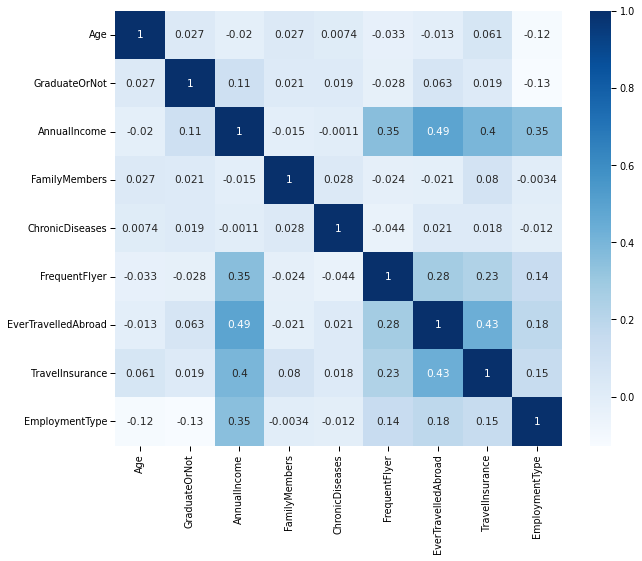

In [119]:
plt.figure(figsize = (10,8))

sns.set_context("paper", font_scale=1.1) 

sns.heatmap(df.corr(), 
        annot=True,
        cmap="Blues")

We can see weak or moderate corelation between all variables.
The highest (but moderate) correlation exist between:
- Annual income and Ever traveled abroad (0.49), 
- Then Annual income and Travel insurance purchase (0.4), 
- Ever Traveled abroad and Travel insurance purchase (0.43).

Probably Annual income is important factor to support customers decision to travel and then to purchase the travel insurance.

## Modelling

### Features & Labels

In [120]:
X = df.drop(['TravelInsurance'], axis=1) #Features
y = df['TravelInsurance'] # Labels

### Train & Test split

We will use parameter called random_state. This is a shuffling parameter that controls how the data is randomly split. If we give it an integer value, we ensure that we reproduce the same split upon each run.

We will select 30% of records to be dedicated for test sample.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
len(X_train), len(X_test)

(1390, 597)

### Random forest

In [143]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rfc_score = accuracy_score(y_pred, y_test)*100

print('Model quality:')
print('Accuracy: ', accuracy_score(y_pred, y_test)*100)
print('Precision:',precision_score(y_test, y_pred, average='macro')*100)
print('Recall:   ',recall_score(y_test, y_pred, average='macro')*100)
print('F1:       ',f1_score(y_test, y_pred, average='macro')*100)

Model quality:
Accuracy:  79.7319932998325
Precision: 79.214699320017
Recall:    76.42342342342342
F1:        77.33904690798781


Lets create a series containing feature importances from the model and feature names from the training data

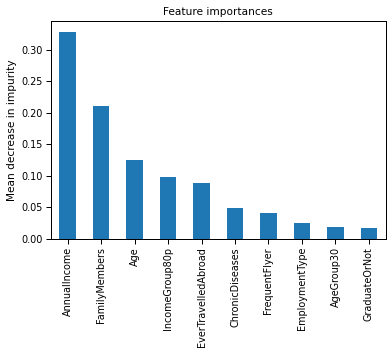

In [144]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

#### K-fold cross-validation 

K-fold cross-validation is the process of splitting data into an integer number (K) parts and using one part for testing and the rest for training. This process is done iteratively until all data has been used for training and testing.

In [145]:
folds = KFold(n_splits=5)

folds.get_n_splits(X)
fold = 0
for train_index, test_index in folds.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    fold = fold +1

    print(f"Accuracy in fold {fold}:", accuracy_score(y_pred, y_test))

Accuracy in fold 1: 0.7814070351758794
Accuracy in fold 2: 0.821608040201005
Accuracy in fold 3: 0.7934508816120907
Accuracy in fold 4: 0.7707808564231738
Accuracy in fold 5: 0.7783375314861462


#### Hyperparameter Tuning

The code below uses Scikit-Learn’s GridSearchCV, which will search parameters within a specified parameter values. 

We define the hyperparameters to use and their ranges in the param_grid dictionary. 

In our case, we are using:
- max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.
- n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.


In [146]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rf = GridSearchCV(estimator = rf, 
                              param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

The best parameters combination:

In [148]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [152]:
grid_search_rf_predict = grid_search_rf.predict(X_test)

RandomForestClassifierScore = grid_search_rf.score(X_test,y_test)
RandomForestClassifierScore

print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rf.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))


Improvement in Random Forest Classifier after GridSearchCV: 1.40%.


In [153]:
print(classification_report(y_test, grid_search_rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       263
           1       0.86      0.57      0.68       134

    accuracy                           0.82       397
   macro avg       0.84      0.76      0.78       397
weighted avg       0.83      0.82      0.81       397



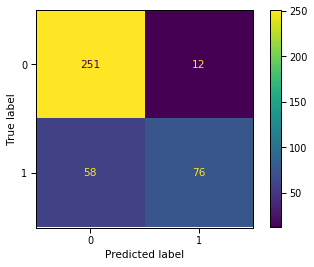

In [157]:
# Generate predictions with the best model
y_pred = grid_search_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [158]:
brfc_score = accuracy_score(y_pred, y_test)*100

print('Model quality:')
print('Accuracy: ', accuracy_score(y_pred, y_test)*100)
print('Precision:',precision_score(y_test, y_pred, average='macro')*100)
print('Recall:   ',recall_score(y_test, y_pred, average='macro')*100)
print('F1:       ',f1_score(y_test, y_pred, average='macro')*100)

Model quality:
Accuracy:  82.36775818639799
Precision: 83.79670491320977
Recall:    76.0768401339311
F1:        78.11535311535312


Let's try another parameters with RandomizedSearchCV

In [160]:
n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [161]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [162]:
model = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [163]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions 

= random_grid, n_iter = 3, cv =3, verbose=2, random_state=42)

In [164]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total t

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [168]:
parameters = rf_random.best_params_

print(parameters)

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': True}


In [171]:
random_search_rf_predict = rf_random.predict(X_test)

RandomForestClassifierScore = rf_random.score(X_test,y_test)
RandomForestClassifierScore

print('Improvement in Random Forest Classifier after RandomizedSearchCV: {:0.2f}%.'.format(100 * (rf_random.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after RandomizedSearchCV: 1.87%.


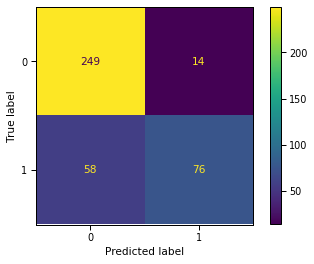

In [172]:
# Generate predictions with the best model
y_pred = rf_random.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [173]:
brfc_random_score = accuracy_score(y_pred, y_test)*100

print('Model quality:')
print('Accuracy: ', accuracy_score(y_pred, y_test)*100)
print('Precision:',precision_score(y_test, y_pred, average='macro')*100)
print('Recall:   ',recall_score(y_test, y_pred, average='macro')*100)
print('F1:       ',f1_score(y_test, y_pred, average='macro')*100)

Model quality:
Accuracy:  81.86397984886649
Precision: 82.77596815056098
Recall:    75.69661199704898
F1:        77.61278195488723


### GradientBoostingClassifier

In [174]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [176]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_acc = accuracy_score(y_pred, y_test)*100
eval_classification(gbc)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.88
Recall (Test Set): 0.57
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.88


#### Hyperparameters Tuning

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[1,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


0.638 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1}
0.785 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.785 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.785 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.638 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1}
0.836 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.835 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.835 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.638 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1}
0.833 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.835 + or -0.014 for the {'learning_rate': 0.01, 'max_d

In [179]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=1.7, min_samples_leaf=1,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=6, n_iter_no_change=None,
                           random_state=42, subsample=1, tol=0.0001,
                           validation_fraction = 0.1, verbose=0,
                           warm_start=False)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
eval_classification(gbc)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.89
Recall (Test Set): 0.57
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.81


### Logistic regresion

In [180]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

y_pred = lr.predict(X_test)
eval_classification(lr)

Accuracy obtained by Logistic Regression model: 66.24685138539043
Accuracy (Test Set): 0.66
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.25
roc_auc (train-proba): 0.26


/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### KNeighbors Classifier

In [181]:
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
KNeighborsClassifierScore = knn.score(X_test,y_test)
print("Accuracy obtained by KNeighborsClassifier model:",KNeighborsClassifierScore*100)
y_pred = knn.predict(X_test)
eval_classification(knn)

Accuracy obtained by KNeighborsClassifier model: 82.11586901763224
Accuracy (Test Set): 0.82
Precision (Test Set): 0.87
Recall (Test Set): 0.55
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.93


### Decision Tree Classifier

In [182]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)
y_pred = tree.predict(X_test)
eval_classification(tree)

Accuracy obtained by Decision Tree Classifier model: 75.06297229219143
Accuracy (Test Set): 0.75
Precision (Test Set): 0.63
Recall (Test Set): 0.63
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.98


#### Hyperparameters Tunning

In [183]:
dtc_clf = DecisionTreeClassifier()
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [4,6,8,12]
max_features = list((range(1,len(X_train.columns) + 1)))
param_distributions = {"criterion":criterion,"splitter":splitter,
                       "max_depth":max_depth, 
                       "max_features":max_features }
rnd_search_cv = RandomizedSearchCV(dtc_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=8, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth

/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 308, in fit
    raise Valu

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 12],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [184]:
rnd_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=4)

In [185]:
dt_score = rnd_search_cv.best_score_
dt_score

0.830817610062893

### Support Vector Classifier

In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

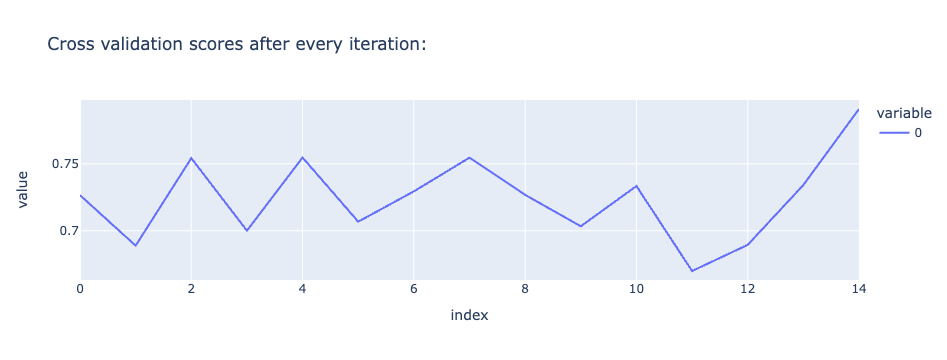

In [203]:
clf = SVC(probability=True)
clf.fit(X_train_scaled, y_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')
px.line(scores, title='Cross validation scores after every iteration: ',
        labels=dict(x="No of iterations"))

In [188]:
print("Accuracy of the SVC model after cross validation:",np.mean(scores))
svc_score_1 = np.mean(scores)

Accuracy of the SVC model after cross validation: 0.7253879676136885


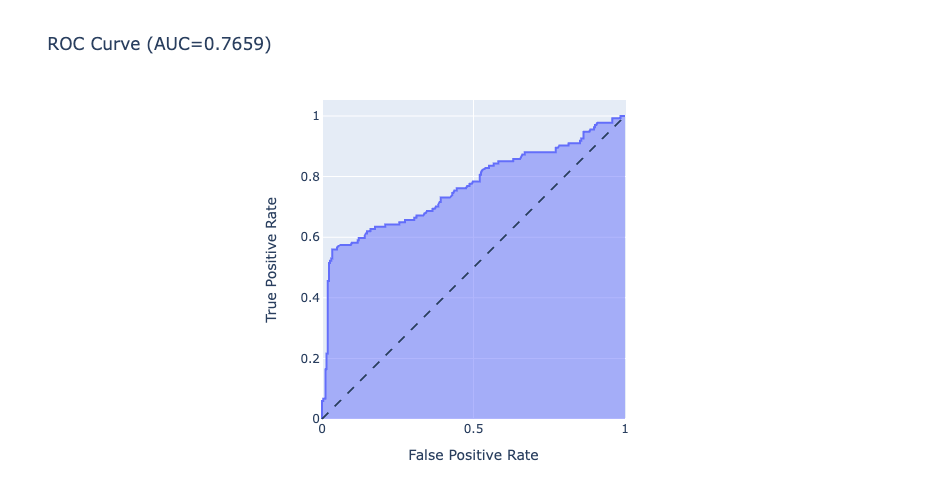

In [190]:
y_predicted = clf.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=800, height=500
)
roc_fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

roc_fig.update_yaxes(scaleanchor="x", scaleratio=1)
roc_fig.update_xaxes(constrain='domain')
roc_fig.show()

Now, I will apply SVC with different kernels and use the method of RandomSearchCV in order to find the best parameter.

In [191]:
svm_clf = SVC(probability=True)
kernel = ['rbf','linear','poly','sigmoid']
param_distributions = {"kernel":kernel,"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=6.251021553463015, gamma=0.03948873118779005, kernel=linear; total time=   0.2s
[CV] END C=6.251021553463015, gamma=0.03948873118779005, kernel=linear; total time=   0.2s
[CV] END C=6.251021553463015, gamma=0.03948873118779005, kernel=linear; total time=   0.2s
[CV] END C=6.251021553463015, gamma=0.03948873118779005, kernel=linear; total time=   0.2s
[CV] END C=6.251021553463015, gamma=0.03948873118779005, kernel=linear; total time=   0.2s
[CV] END C=1.6815650369912118, gamma=0.06667869588483831, kernel=rbf; total time=   0.3s
[CV] END C=1.6815650369912118, gamma=0.06667869588483831, kernel=rbf; total time=   0.3s
[CV] END C=1.6815650369912118, gamma=0.06667869588483831, kernel=rbf; total time=   0.3s
[CV] END C=1.6815650369912118, gamma=0.06667869588483831, kernel=rbf; total time=   0.3s
[CV] END C=1.6815650369912118, gamma=0.06667869588483831, kernel=rbf; total time=   0.3s
[CV] END C=4.689819412323273, gamma=0.0

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa810e44250>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa800b7d190>,
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [93]:
rnd_search_cv.best_estimator_

SVC(C=9.72268763261836, gamma=0.047995898890243964, kernel='poly',
    probability=True)

In [94]:
rnd_search_cv.best_score_

0.7924528301886793

### Comparison of Different Algorithms

In [199]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'Best Random Forest Classifier',
               'Random Forest Classifier after GridSearchCV','Random Forest Classifier after RandomizedSearchCV',
               'GradientBoostingClassifier', 'Logistic regresion',
               'KNeighbors Classifier', 'Decision Tree Classifier', 'Decision Tree Classifier Tunned',
              'Support Vector Classifier'],
    'Score' : [ rfc_score, brfc_score, RandomForestClassifierScore*100, brfc_random_score,
               gbc_acc, LogisticRegressionScore*100, KNeighborsClassifierScore*100, DecisionTreeClassifierScore*100,
              dt_score*100, svc_score_1*100]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Decision Tree Classifier Tunned,83.081761
4,GradientBoostingClassifier,82.871537
1,Best Random Forest Classifier,82.367758
6,KNeighbors Classifier,82.115869
2,Random Forest Classifier after GridSearchCV,81.863980
3,Random Forest Classifier after RandomizedSearchCV,81.863980
0,Random Forest Classifier,79.731993
7,Decision Tree Classifier,75.062972
9,Support Vector Classifier,72.538797
5,Logistic regresion,66.246851


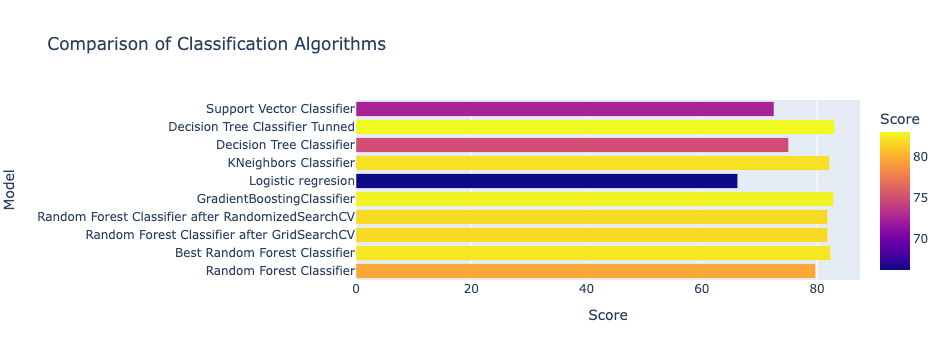

In [202]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', 
       title = 'Comparison of Classification Algorithms')

## Conclusions

- The best model to predict if customer purchase the travel insurance is Decision Tree Classifier model after hyperparameters tunning (max_depth=6, max_features=4). This model accuracy is 83.081761%.
- GradientBoostingClassifier, Random Forest Classifier, Neighbors Classifier clasifies customers whether they will purchase the travel insurance gives also good results.
- The most impact to the model has these attributes: Annual income, Family members and customer age.